# Problem klas niezbalansowanych 

In [9]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression

#### Case study 

W pliku `creditcardfraud.csv` znajdziecie plik z danymi o transakcjach kartami płatniczymi wraz z informacją, czy dana transakcja to fraud. Zbadaj dane pod kątem ich niezbalansowania. Zaproponuj metrykę którą ocenisz jakość predykcji, a następnie zbuduj jak najlepszy model pod kątem tej metryki.

In [10]:
data = pd.read_csv('./Dane/creditcard.csv')

In [11]:
data.shape

(284807, 31)

In [12]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [13]:
data['Class'].mean()

0.001727485630620034

In [14]:
data['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

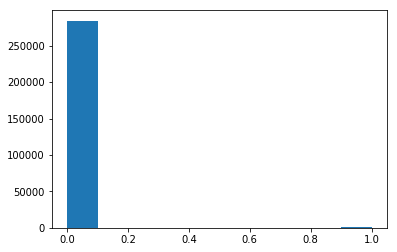

In [15]:
y = data['Class']

plt.hist(y)
plt.show()

In [16]:
X = data.filter(regex="V")
X.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153


In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

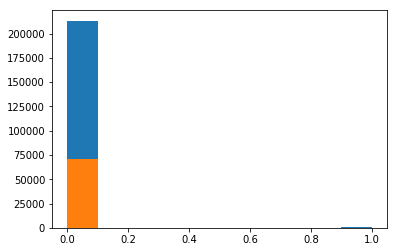

In [18]:
plt.hist(y_train)
plt.hist(y_test)
plt.show()

In [19]:
print("train")
print(len(y_train[y_train==0]))
print(len(y_train[y_train==1]))
print(len(y_train[y_train==1])/len(y_train[y_train==0]))
print()
print("test")
print(len(y_test[y_test==0]))
print(len(y_test[y_test==1]))
print(len(y_test[y_test==1])/len(y_test[y_test==0]))
print()

train
213226
379
0.0017774567829439186

test
71089
113
0.0015895567528028246



# Zad

Proszę znaleść optymalny model przypadku

 * Oversampling
 * Undersampling


In [23]:
X_train = X_train.values

In [39]:
# 213226/379

In [24]:
X_smaller_0 = X_train[y_train == 0, :]
X_smaller_1 = X_train[y_train == 1, :]

print(X_smaller_0.shape, X_smaller_1.shape)

indices_0_undersampled = np.random.choice(X_smaller_0.shape[0], size=X_smaller_1.shape[0], replace=False)

X_undersampled_0 = X_smaller_0[indices_0_undersampled]

X_undersampled = np.vstack([X_undersampled_0, X_smaller_1])

y_undersampled = np.array([0]*X_undersampled_0.shape[0] + [1]*X_smaller_1.shape[0]) 

print(X_undersampled.shape, y_undersampled.shape)

(213226, 28) (379, 28)
(758, 28) (758,)


In [28]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=50,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_undersampled, y_undersampled)
y_pred = bag_clf.predict(X_undersampled)

# X_undersampled
# y_undersampled

In [29]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_undersampled, y_pred))
accuracy_score(y_undersampled, y_pred)

0.9366754617414248


In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_undersampled, y_pred))#, target_names=["not 5", "5"]))

             precision    recall  f1-score   support

          0       0.90      0.98      0.94       379
          1       0.98      0.89      0.93       379

avg / total       0.94      0.94      0.94       758



 # Zad

Proszę znaleść optymalny model przypadku

 * Ważona funkcja straty

In [30]:
213226/758

281.30079155672826

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.svm import SVC

from sklearn.model_selection import StratifiedKFold

seed=123
kfold = StratifiedKFold(n_splits=5, random_state=seed)

param_grid = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100]
}

grid_1 = GridSearchCV(SVC(C=1, class_weight={0:1, 1:562}), 
                      param_grid, 
                      cv=kfold, 
                      return_train_score=True)

grid_1.fit(X_undersampled, y_undersampled)
grid_1.best_params_

{'C': 10}